## Analysis of RL Evaluation Performance

In [46]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy import stats
from scipy.stats import ks_2samp


In [2]:
pd.set_option('display.max_columns', None)

### Actuated / Baseline Results

In [179]:
# load data
df = pd.read_csv('../src/data/actuated_output/actuated_output_9000steps_moreInfo.csv')
df

,Step,num_vehicles,vehicle_types,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,totalCO2Emission,totalCOEmission,totalHCEmission,totalPMxEmission,totalNOxEmission,totalFuelConsumption,totalNoiseEmission,totalWaitingTime,totalStoppedVehicles,tls159_phase,tls159_phase_duration,tls159_state,tls160_phase,tls160_phase_duration,tls160_state,tls161_phase,tls161_phase_duration,tls161_state
0,25200,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,1.123389e+04,359.172222,1.453889,2.442333,86.401389,3.550833e+03,178.991223,0.0,4,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
1,25201,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,2.186324e+04,666.801335,3.018414,2.957748,97.425541,6.936337e+03,271.159876,0.0,1,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
2,25202,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,3.250170e+04,924.722737,4.318140,3.586446,120.598029,1.031744e+04,335.695376,0.0,1,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
3,25203,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,5.051227e+04,1100.544598,5.200979,6.431233,241.016657,1.601038e+04,463.885510,1.0,3,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
4,25204,0,[],0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0,5.705453e+04,1113.852123,5.385111,6.785382,271.569370,1.807950e+04,530.103937,1.0,3,0,19.0,GGGgrrrrrrgGgGGrrrGG,0,19.0,rgGgGrrrrrrrrrrrGGrGGrG,11,48.0,ggggggggggrrrrrrrrrrgrg
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,34195,52,"['tram', 'truck_truck', 'DEFAULT_VEHTYPE', 'DE...",0.181145,194300.309894,6498.118625,30.343889,30.414016,1135.241915,61541.781705,602.188689,10518.0,50,1.035623e+07,298932.382590,1492.915635,1543.197178,59286.595645,3.280027e+06,153152.623377,285478.0,2356,9,5.0,rrrrrrrrggrrrrrrrrrr,9,6.0,Grrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8996,34196,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.247139,195624.565105,6598.860550,30.896463,30.197247,1118.704758,61973.963843,601.374697,10568.0,50,1.026276e+07,299508.798829,1484.959727,1522.649404,58323.239028,3.250658e+06,153236.806372,286899.0,2369,9,5.0,rrrrrrrrggrrrrrrrrrr,9,6.0,Grrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8997,34197,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.225469,178850.217767,6577.795503,30.872759,27.146556,977.740806,56690.937989,590.879707,10317.0,49,1.002934e+07,298550.299521,1494.417203,1494.745823,56836.189267,3.177041e+06,153126.254984,288079.0,2383,10,3.0,rrrrrrrryyrrrrrrrrrr,10,3.0,yrrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr
8998,34198,53,"['tram', 'DEFAULT_VEHTYPE', 'truck_truck', 'DE...",0.212102,183281.244519,6660.068031,31.349939,27.222564,979.589268,58104.239534,592.245318,10067.0,49,1.000221e+07,297833.825881,1488.489231,1500.619033,56989.616427,3.168340e+06,153076.399943,288953.0,2385,10,3.0,rrrrrrrryyrrrrrrrrrr,10,3.0,yrrrrrrrrrrrrrrrrrrrrrr,6,4.0,rrrrrrrrrrrrrrrrrryyrrr


In [180]:
df = df[df['num_vehicles'] != 0]

In [86]:
df[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean()

localCO2Emission          161659.538171
localCOEmission             4932.733414
localHCEmission               24.395986
localPMxEmission              26.341775
localNOxEmission             982.120171
localNoiseEmission           558.671151
local_fuel_consumption     51194.174864
dtype: float64

In [138]:
df[['localWaitingTime','localStoppedVehicles']].mean()

localWaitingTime        8527.401052
localStoppedVehicles      38.605328
dtype: float64

In [147]:
df.tls159_phase.value_counts()

8     1900
0     1881
5     1878
3      589
6      500
9      500
1      495
7      300
10     300
2      297
4      294
Name: tls159_phase, dtype: int64

In [111]:
df[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].describe()

,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,localNoiseEmission,local_fuel_consumption
count,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000,8934.000000
mean,161659.538171,4932.733414,24.395986,26.341775,982.120171,558.671151,51194.174864
std,71148.392174,2107.977845,9.967727,13.882439,518.588792,171.344259,22503.813742
min,0.000000,0.000000,0.000000,0.000000,0.000000,48.584153,0.000000
25%,112245.933912,3214.353481,16.816778,17.214878,632.097585,452.418422,35540.623180
50%,156939.870355,5042.597812,25.088799,24.077436,891.976657,546.524912,49725.587378
75%,216087.356136,6742.382730,32.307772,36.090041,1376.911273,666.130636,68449.168332
max,358090.949834,9328.203731,49.180591,63.143881,2463.819377,1137.788603,113237.425938


### RL Results

#### Load episode data into one dataframe for each reward function

In [ ]:
# Load data for speed evaluation
inputdir = '../src/data/evaluation/speed'

speed_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('average-speed_200_df'):
        temp_df_speed = pd.read_csv(os.path.join(inputdir, file))
        temp_df_speed['episode'] = i # add episode column
        speed_eval = speed_eval.append(temp_df_speed, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
speed_eval = speed_eval[speed_eval['num_vehicles'] != 0]

In [ ]:
# Load data to evaluate total emissions for speed
inputdir = '../src/data/evaluation/speed'

speed_total = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('average-speed_200_conn'):
        temp_df_speed = pd.read_csv(os.path.join(inputdir, file))
        temp_df_speed['episode'] = i # add episode column
        speed_total = speed_total.append(temp_df_speed, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
speed_total = speed_total[speed_total['system_local_#vehicles'] != 0]

In [ ]:
# Load data for queue evaluation
inputdir = '../src/data/evaluation/queue'

queue_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_queue
    if file.startswith('queue_200_df'):
        temp_df_queue = pd.read_csv(os.path.join(inputdir, file))
        temp_df_queue['episode'] = i # add episode column
        queue_eval = queue_eval.append(temp_df_queue, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
queue_eval = queue_eval[queue_eval['num_vehicles'] != 0]

In [ ]:
# Load data to evaluate total emissions for queue
inputdir = '../src/data/evaluation/queue'

queue_total = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('queue_200_conn'):
        temp_df_queue = pd.read_csv(os.path.join(inputdir, file))
        temp_df_queue['episode'] = i # add episode column
        queue_total = queue_total.append(temp_df_queue, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
queue_total = queue_total[queue_total['system_local_#vehicles'] != 0]

In [ ]:
# Load data for waitTime evaluation
inputdir = '../src/data/evaluation/waitingTime'

waitTime_200_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_waitTime
    if file.startswith('waitingTime_200_df'):
        temp_df_waitTime200 = pd.read_csv(os.path.join(inputdir, file))
        temp_df_waitTime200['episode'] = i # add episode column
        waitTime_200_eval = waitTime_200_eval.append(temp_df_waitTime200, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
waitTime_200_eval = waitTime_200_eval[waitTime_200_eval['num_vehicles'] != 0]

In [ ]:
# Load data to evaluate total emissions for waiting Time
inputdir = '../src/data/evaluation/waitingTime'

waitingTime_total = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('waitingTime_200_conn'):
        temp_dfWT = pd.read_csv(os.path.join(inputdir, file))
        temp_dfWT['episode'] = i # add episode column
        waitingTime_total = waitingTime_total.append(temp_dfWT, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
waitingTime_total = waitingTime_total[waitingTime_total['system_local_#vehicles'] != 0]

In [ ]:
# Load data for waitTime evaluation 400
inputdir = '../src/data/evaluation/waitingTime'

waitTime_400_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_waitTime
    if file.startswith('waitingTime_400_df'):
        temp_df_waitTime400 = pd.read_csv(os.path.join(inputdir, file))
        temp_df_waitTime400['episode'] = i # add episode column
        waitTime_400_eval = waitTime_400_eval.append(temp_df_waitTime400, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
waitTime_400_eval = waitTime_400_eval[waitTime_400_eval['num_vehicles'] != 0]

In [ ]:
# Load data to evaluate total emissions for waiting Time
inputdir = '../src/data/evaluation/waitingTime'

waitingTime400_total = pd.DataFrame()
temp_dfWT = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('waitingTime_400_conn'):
        temp_dfWT = pd.read_csv(os.path.join(inputdir, file))
        temp_dfWT['episode'] = i # add episode column
        waitingTime400_total = waitingTime400_total.append(temp_dfWT, ignore_index=True)
        i += 1

# remove all rows with 0 ve400hicles
waitingTime400_total = waitingTime400_total[waitingTime400_total['system_local_#vehicles'] != 0]

In [ ]:
# Load data for waitTime evaluation 900
inputdir = '../src/data/evaluation/waitingTime'

waitTime_900_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_waitTime
    if file.startswith('waitingTime_900_df'):
        temp_df_waitTime900 = pd.read_csv(os.path.join(inputdir, file))
        temp_df_waitTime900['episode'] = i # add episode column
        waitTime_900_eval = waitTime_900_eval.append(temp_df_waitTime900, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
waitTime_900_eval = waitTime_900_eval[waitTime_900_eval['num_vehicles'] != 0]

In [ ]:
# Load data to evaluate total emissions for waiting Time
inputdir = '../src/data/evaluation/waitingTime'

waitingTime900_total = pd.DataFrame()
temp_dfWT = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_speed
    if file.startswith('waitingTime_900_conn'):
        temp_dfWT = pd.read_csv(os.path.join(inputdir, file))
        temp_dfWT['episode'] = i # add episode column
        waitingTime900_total = waitingTime900_total.append(temp_dfWT, ignore_index=True)
        i += 1

# remove all rows with 0 vehicles
waitingTime900_total = waitingTime900_total[waitingTime900_total['system_local_#vehicles'] != 0]

In [ ]:
# Load data for emission evaluation
inputdir = '../src/data/evaluation/emission'

emission_eval = pd.DataFrame()
i = 1

# iterate over all files in the folder for each reward type
for file in os.listdir(inputdir):
    
    # create dataframe for all files that start with avg_emission
    if file.startswith('combined_emission_200_df'):
        temp_df_emission = pd.read_csv(os.path.join(inputdir, file))
        temp_df_emission['episode'] = i # add episode column
        emission_eval = emission_eval.append(temp_df_emission, ignore_index=True)
        i += 1
        
# remove all rows with 0 vehicles
emission_eval = emission_eval[emission_eval['num_vehicles'] != 0]

#### Vehicle / Simulation Statistics

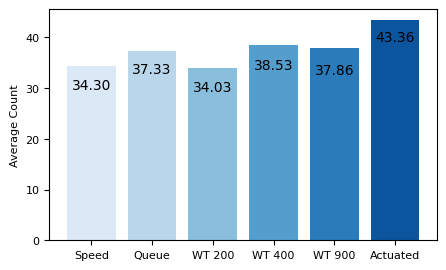

In [193]:
# get average number of vehicles
df_list = [(speed_eval, 'Speed'), (queue_eval, 'Queue'), (waitTime_200_eval, 'WT 200'), 
       (waitTime_400_eval, 'WT 400'),(waitTime_900_eval, 'WT 900'),(df, 'Actuated')]

means = []
categories = []

colors = sns.color_palette("Blues")

for (df, name) in df_list:
       means.append(df['num_vehicles'].mean())
       categories.append(name)

plt.figure(figsize=(5, 3))

# Create bar chart
plt.bar(categories, means, align='center', alpha=1, capsize=10, color=colors)

# Add values on top of each bar
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mean:.2f}', ha='center', va='bottom', fontsize=10)


plt.ylabel('Average Count')

plt.show()


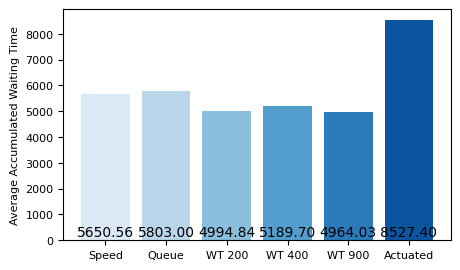

In [194]:
# get average waiting time

df_list = [(speed_eval, 'Speed'), (queue_eval, 'Queue'), (waitTime_200_eval, 'WT 200'), 
       (waitTime_400_eval, 'WT 400'),(waitTime_900_eval, 'WT 900'),(df, 'Actuated')]

means = []
categories = []

colors = sns.color_palette("Blues")

for (df, name) in df_list:
       means.append(df['localWaitingTime'].mean())
       categories.append(name)

plt.figure(figsize=(5, 3))

# Create bar chart
plt.bar(categories, means, align='center', alpha=1, capsize=10, color=colors)

plt.ylabel('Average Accumulated Waiting Time')

# Add values on top of each bar
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mean:.2f}', ha='center', va='bottom', fontsize=10)


plt.show()

	

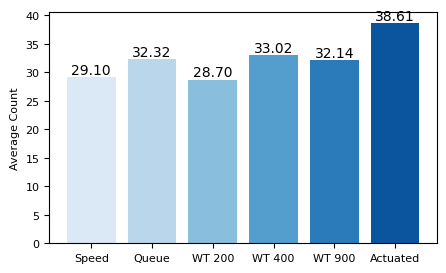

In [192]:
# get average vehicles stopped

df_list = [(speed_eval, 'Speed'), (queue_eval, 'Queue'), (waitTime_200_eval, 'WT 200'), 
       (waitTime_400_eval, 'WT 400'),(waitTime_900_eval, 'WT 900'),(df, 'Actuated')]

means = []
categories = []

colors = sns.color_palette("Blues")

for (df, name) in df_list:
    means.append(df['localStoppedVehicles'].mean())
    categories.append(name)

plt.figure(figsize=(5, 3))

# Create bar chart
bars = plt.bar(categories, means, align='center', alpha=1, capsize=10, color=colors)

plt.ylabel('Average Count')

# Add values on top of each bar
for bar, mean in zip(bars, means):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{mean:.2f}', ha='center', va='bottom', fontsize=10)


plt.show()


#### Compare total emission of the entire simulation sceanrio

In [7]:
df[['totalCO2Emission','totalCOEmission','totalHCEmission','totalPMxEmission','totalNOxEmission','totalNoiseEmission']].mean()/1000

totalCO2Emission      6225.563043
totalCOEmission        152.394163
totalHCEmission          0.784381
totalPMxEmission         0.906551
totalNOxEmission        36.104607
totalNoiseEmission      87.941218
dtype: float64

In [21]:
print('Speed')
speed_total[['system_total_CO2','system_total_PMx','system_total_NOx','system_total_noise_emission']].mean()/1000

Speed


system_total_CO2               6084.634717
system_total_PMx                  0.886119
system_total_NOx                 35.381860
system_total_noise_emission      85.529256
dtype: float64

In [42]:
print('Queue')
queue_total[['system_total_CO2','system_total_PMx','system_total_NOx','system_total_noise_emission']].mean()/1000

Queue


system_total_CO2               6196.681883
system_total_PMx                  0.904999
system_total_NOx                 36.005674
system_total_noise_emission      87.513588
dtype: float64

In [43]:
print('Waiting Time')
waitingTime_total[['system_total_CO2','system_total_PMx','system_total_NOx','system_total_noise_emission']].mean()/1000

Waiting Time


system_total_CO2               5994.265282
system_total_PMx                  0.876227
system_total_NOx                 35.027504
system_total_noise_emission      83.957299
dtype: float64

In [161]:
print('Waiting Time 400')
waitingTime400_total[['system_total_CO2','system_total_PMx','system_total_NOx','system_total_noise_emission']].mean()/1000

Waiting Time 400


system_total_CO2               5749.320757
system_total_PMx                  0.833126
system_total_NOx                 33.491810
system_total_noise_emission      80.057576
dtype: float64

In [162]:
print('Waiting Time 900')
waitingTime900_total[['system_total_CO2','system_total_PMx','system_total_NOx','system_total_noise_emission']].mean()/1000

Waiting Time 900


system_total_CO2               6022.896272
system_total_PMx                  0.876147
system_total_NOx                 35.018216
system_total_noise_emission      84.585626
dtype: float64

In [60]:
# get significance level for difference in total emission with t-test


# data for Actuated, Diff Waiting Time, Average Speed, and Queue
actuated_data = np.array(df['totalCO2Emission'])
diff_waiting_time_data = np.array(waitingTime_total['system_total_CO2'])
average_speed_data = np.array(speed_total['system_total_CO2'])
queue_data = np.array(queue_total['system_total_CO2'])

# significance level (alpha)
alpha = 0.05

# Perform t-tests for Actuated vs. Diff Waiting Time, Average Speed, and Queue
t_statistic_dw, p_value_dw = stats.ttest_ind(actuated_data, diff_waiting_time_data)
t_statistic_as, p_value_as = stats.ttest_ind(actuated_data, average_speed_data)
t_statistic_q, p_value_q = stats.ttest_ind(actuated_data, queue_data)

# Compare p-values to alpha and print the results
if p_value_dw < alpha:
    print("Reject the null hypothesis for Actuated vs. Diff Waiting Time.")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Diff Waiting Time.")

if p_value_as < alpha:
    print("Reject the null hypothesis for Actuated vs. Average Speed.")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Average Speed.")

if p_value_q < alpha:
    print("Reject the null hypothesis for Actuated vs. Queue.")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Queue.")

print("T-statistics and p-values:")
print(f"Actuated vs. Diff Waiting Time - t-statistic: {t_statistic_dw}, p-value: {p_value_dw}")
print(f"Actuated vs. Average Speed - t-statistic: {t_statistic_as}, p-value: {p_value_as}")
print(f"Actuated vs. Queue - t-statistic: {t_statistic_q}, p-value: {p_value_q}")

Reject the null hypothesis for Actuated vs. Diff Waiting Time.
Reject the null hypothesis for Actuated vs. Average Speed.
Fail to reject the null hypothesis for Actuated vs. Queue.
T-statistics and p-values:
Actuated vs. Diff Waiting Time - t-statistic: 7.008228112821554, p-value: 2.4995787173826684e-12
Actuated vs. Average Speed - t-statistic: 4.1959116209405956, p-value: 2.7308752122297823e-05
Actuated vs. Queue - t-statistic: 0.8263730302544684, p-value: 0.4086035437742821


In [68]:
import numpy as np
from scipy.stats import mannwhitneyu

# data for Actuated, Diff Waiting Time, Average Speed, and Queue
actuated_data = np.array(df['totalCO2Emission'])
diff_waiting_time_data = np.array(waitingTime_total['system_total_CO2'])
average_speed_data = np.array(speed_total['system_total_CO2'])
queue_data = np.array(queue_total['system_total_CO2'])

# Define the significance level (alpha)
alpha = 0.05

# Perform Mann-Whitney U test for Actuated vs. Diff Waiting Time
statistic_dw, p_value_dw = mannwhitneyu(actuated_data, diff_waiting_time_data, alternative='two-sided')

# Perform Mann-Whitney U test for Actuated vs. Average Speed
statistic_as, p_value_as = mannwhitneyu(actuated_data, average_speed_data, alternative='two-sided')

# Perform Mann-Whitney U test for Actuated vs. Queue
statistic_q, p_value_q = mannwhitneyu(actuated_data, queue_data, alternative='two-sided')

# Compare p-values to alpha and print the results
if p_value_dw < alpha:
    print("Reject the null hypothesis for Actuated vs. Diff Waiting Time (Mann-Whitney U Test).")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Diff Waiting Time (Mann-Whitney U Test).")

if p_value_as < alpha:
    print("Reject the null hypothesis for Actuated vs. Average Speed (Mann-Whitney U Test).")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Average Speed (Mann-Whitney U Test).")

if p_value_q < alpha:
    print("Reject the null hypothesis for Actuated vs. Queue (Mann-Whitney U Test).")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Queue (Mann-Whitney U Test).")

# Print the Mann-Whitney U test statistics and p-values for reference
print("Mann-Whitney U Test statistics and p-values:")
print(f"Actuated vs. Diff Waiting Time - U statistic: {statistic_dw}, p-value: {p_value_dw}")
print(f"Actuated vs. Average Speed - U statistic: {statistic_as}, p-value: {p_value_as}")
print(f"Actuated vs. Queue - U statistic: {statistic_q}, p-value: {p_value_q}")


Reject the null hypothesis for Actuated vs. Diff Waiting Time (Mann-Whitney U Test).
Reject the null hypothesis for Actuated vs. Average Speed (Mann-Whitney U Test).
Reject the null hypothesis for Actuated vs. Queue (Mann-Whitney U Test).
Mann-Whitney U Test statistics and p-values:
Actuated vs. Diff Waiting Time - U statistic: 43155201.0, p-value: 3.620045554204594e-20
Actuated vs. Average Speed - U statistic: 42457722.0, p-value: 6.38925943834048e-13
Actuated vs. Queue - U statistic: 41727374.0, p-value: 3.85279145800054e-07


#### Get Local Emission Info

In [161]:
print('Queue')
print(queue_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())

Queue
localCO2Emission          133826.399346
localCOEmission             3977.022517
localHCEmission               21.415695
localPMxEmission              21.570812
localNOxEmission             806.669184
localNoiseEmission           457.479658
local_fuel_consumption     42382.136710
dtype: float64


In [147]:
queue_eval.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/1741793804.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  queue_eval.groupby('episode').mean()


,num_vehicles,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,tls159_phase,tls159_phase_duration,tls160_phase,tls160_phase_duration,tls161_phase,tls161_phase_duration
episode,,,,,,,,,,,,,,,,,
1,41.233408,1.286126,154055.558411,4425.771579,23.004139,25.412531,956.056589,48776.976519,462.821850,8561.864454,36.113611,0.0,1.0,0.0,1.0,0.0,1.0
2,42.825745,1.136250,141784.545504,4553.541220,26.939181,21.565981,793.306885,44933.979846,529.777008,6331.442945,38.195053,0.0,1.0,0.0,1.0,0.0,1.0
3,30.691962,1.340007,112339.437108,3443.777528,17.447854,17.489841,655.689425,35582.582410,378.476891,4427.275998,25.709949,0.0,1.0,0.0,1.0,0.0,1.0
4,37.897695,1.293040,132348.039088,3754.872625,20.428523,22.357678,836.098067,41898.127240,491.886462,4866.517707,32.431703,0.0,1.0,0.0,1.0,0.0,1.0
5,34.004497,1.402142,128615.787703,3707.401883,19.259669,21.030188,792.278929,40722.612162,424.439081,4829.463744,29.151771,0.0,1.0,0.0,1.0,0.0,1.0


In [145]:
print('Average Speed')
print(speed_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())


Average Speed
localCO2Emission          135901.950288
localCOEmission             3693.659587
localHCEmission               18.833195
localPMxEmission              23.061042
localNOxEmission             872.524854
localNoiseEmission           411.184573
local_fuel_consumption     43016.268308
dtype: float64


In [146]:
speed_eval.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/968340222.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  speed_eval.groupby('episode').mean()


,num_vehicles,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,tls159_phase,tls159_phase_duration,tls160_phase,tls160_phase_duration,tls161_phase,tls161_phase_duration
episode,,,,,,,,,,,,,,,,,
1,35.781900,1.374325,135112.200370,3955.326622,20.197099,21.857540,822.920049,42783.412363,424.491392,4716.500843,30.550309,0.0,1.0,0.0,1.0,0.0,1.0
2,31.345700,1.380231,118656.369602,3524.401324,17.865706,18.290689,692.220785,37583.718696,366.136087,2879.105677,25.722316,0.0,1.0,0.0,1.0,0.0,1.0
3,39.585160,1.115344,163920.454845,4188.963581,21.670740,29.867622,1126.274587,51859.740901,454.915532,8723.234401,35.407532,0.0,1.0,0.0,1.0,0.0,1.0
4,29.509551,1.380451,118778.630456,3100.744143,15.625297,20.156023,768.164246,37592.046346,377.557930,2998.084270,24.196629,0.0,1.0,0.0,1.0,0.0,1.0
5,35.293820,1.344145,143047.704693,3699.192441,18.808951,25.133804,953.057999,45264.208667,432.828660,8935.494944,29.644944,0.0,1.0,0.0,1.0,0.0,1.0


In [160]:
print('Wait Time 200')
print(waitTime_200_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())


Wait Time 200
localCO2Emission          122944.015714
localCOEmission             3931.759568
localHCEmission               20.244416
localPMxEmission              18.340119
localNOxEmission             685.593498
localNoiseEmission           425.919802
local_fuel_consumption     38954.612006
dtype: float64


In [153]:
waitTime_200_eval.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/4125885268.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  waitTime_200_eval.groupby('episode').mean()


,num_vehicles,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,tls159_phase,tls159_phase_duration,tls160_phase,tls160_phase_duration,tls161_phase,tls161_phase_duration
episode,,,,,,,,,,,,,,,,,
1,34.684624,1.214307,117864.853709,4327.470942,21.821512,15.249333,561.665204,37382.702803,421.226947,5301.475870,29.464085,0.0,1.0,0.0,1.0,0.0,1.0
2,31.823793,1.332558,124881.762945,3420.280283,17.961714,20.378254,775.243490,39536.467563,416.337835,2947.194164,25.951178,0.0,1.0,0.0,1.0,0.0,1.0
3,29.157127,1.346874,106134.287222,3335.044394,17.051525,15.551846,587.089616,33627.814151,370.599793,3353.361392,23.960718,0.0,1.0,0.0,1.0,0.0,1.0
4,40.199214,1.125883,145928.853949,4683.824568,24.284700,22.900630,846.322058,46228.723401,486.970787,7712.305836,35.239057,0.0,1.0,0.0,1.0,0.0,1.0
5,34.284512,1.346529,119910.320743,3892.177650,20.102629,17.620531,657.647121,37997.352113,434.463648,5659.862514,28.879910,0.0,1.0,0.0,1.0,0.0,1.0


In [163]:
print('Wait Time 400')
print(waitTime_400_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())

Wait Time 400
localCO2Emission          144625.405660
localCOEmission             4256.799962
localHCEmission               22.807803
localPMxEmission              23.303580
localNOxEmission             873.634615
localNoiseEmission           485.906333
local_fuel_consumption     45800.788922
dtype: float64


In [155]:
waitTime_400_eval.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/2192217393.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  waitTime_400_eval.groupby('episode').mean()


,num_vehicles,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,tls159_phase,tls159_phase_duration,tls160_phase,tls160_phase_duration,tls161_phase,tls161_phase_duration
episode,,,,,,,,,,,,,,,,,
1,33.712689,1.283515,125621.825545,3722.921550,19.111616,20.158201,757.286090,39780.024510,422.462424,5029.116825,28.278368,0.0,1.0,0.0,1.0,0.0,1.0
2,30.256568,1.388339,115123.007808,3269.241107,16.957754,18.289233,695.185154,36452.539582,406.873344,3485.989939,24.468977,0.0,1.0,0.0,1.0,0.0,1.0
3,38.503356,1.342989,144318.386656,4180.749906,23.067932,23.566866,881.973590,45700.656182,500.432767,3791.969799,32.573826,0.0,1.0,0.0,1.0,0.0,1.0
4,44.226942,1.159447,174923.914967,4768.691259,25.518932,30.079749,1131.395169,55369.091675,518.479848,8315.096143,38.937395,0.0,1.0,0.0,1.0,0.0,1.0
5,45.972595,1.200340,163150.076473,5342.960613,29.386602,24.424625,902.353788,51704.876905,581.344748,5325.602908,40.833333,0.0,1.0,0.0,1.0,0.0,1.0


In [164]:
print('Wait Time 900')
print(waitTime_900_eval[['localCO2Emission','localCOEmission','localHCEmission','localPMxEmission','localNOxEmission','localNoiseEmission', 'local_fuel_consumption']].mean())


Wait Time 900
localCO2Emission          141872.919921
localCOEmission             4302.094848
localHCEmission               21.749922
localPMxEmission              22.303856
localNOxEmission             837.315444
localNoiseEmission           474.224064
local_fuel_consumption     44934.929234
dtype: float64


In [187]:
waitTime_900_eval.groupby('episode').mean()

/var/folders/45/67c621jx4zd38ksd1pb9g15h0000gn/T/ipykernel_84036/58056786.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  waitTime_900_eval.groupby('episode').mean()


,num_vehicles,avg_speed,localCO2Emission,localCOEmission,localHCEmission,localPMxEmission,localNOxEmission,local_fuel_consumption,localNoiseEmission,localWaitingTime,localStoppedVehicles,tls159_phase,tls159_phase_duration,tls160_phase,tls160_phase_duration,tls161_phase,tls161_phase_duration
episode,,,,,,,,,,,,,,,,,
1,39.724002,1.087764,156612.225366,4313.783307,22.486052,26.685706,1005.383737,49574.405130,505.369943,5965.160202,34.672288,0.0,1.0,0.0,1.0,0.0,1.0
2,35.349438,1.414211,129808.455516,4105.348738,20.477049,19.243319,723.899321,41128.013264,454.696958,5191.844382,29.330337,0.0,1.0,0.0,1.0,0.0,1.0
3,30.921348,1.246218,116541.557538,3537.918578,17.630205,17.638299,667.358441,36917.658123,404.811569,3300.612921,25.515730,0.0,1.0,0.0,1.0,0.0,1.0
4,40.425281,1.199231,145874.156661,4737.627715,23.358481,21.949360,817.949668,46218.625569,471.935684,4958.735955,34.148315,0.0,1.0,0.0,1.0,0.0,1.0
5,42.857865,1.221543,160536.485031,4815.802471,24.798239,26.005061,972.080475,50838.550529,534.323666,5404.356180,37.025281,0.0,1.0,0.0,1.0,0.0,1.0


In [65]:
# Data for Actuated, Diff Waiting Time, Average Speed, and Queue
actuated_data = np.array(df['localCO2Emission'])
diff_waiting_time_data = np.array(waitTime_200_eval['localCO2Emission'])
average_speed_data = np.array(speed_eval['localCO2Emission'])
queue_data = np.array(queue_eval['localCO2Emission'])

# Define the significance level (alpha)
alpha = 0.05

# Perform KS test for Actuated vs. Diff Waiting Time
statistic_dw, p_value_dw = ks_2samp(actuated_data, diff_waiting_time_data)

# Perform KS test for Actuated vs. Average Speed
statistic_as, p_value_as = ks_2samp(actuated_data, average_speed_data)

# Perform KS test for Actuated vs. Queue
statistic_q, p_value_q = ks_2samp(actuated_data, queue_data)

# Compare p-values to alpha and print the results
if p_value_dw < alpha:
    print("Reject the null hypothesis for Actuated vs. Diff Waiting Time (KS Test).")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Diff Waiting Time (KS Test).")

if p_value_as < alpha:
    print("Reject the null hypothesis for Actuated vs. Average Speed (KS Test).")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Average Speed (KS Test).")

if p_value_q < alpha:
    print("Reject the null hypothesis for Actuated vs. Queue (KS Test).")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Queue (KS Test).")

# Print the KS test statistics and p-values for reference
print("KS Test statistics and p-values:")
print(f"Actuated vs. Diff Waiting Time - KS statistic: {statistic_dw}, p-value: {p_value_dw}")
print(f"Actuated vs. Average Speed - KS statistic: {statistic_as}, p-value: {p_value_as}")
print(f"Actuated vs. Queue - KS statistic: {statistic_q}, p-value: {p_value_q}")


Reject the null hypothesis for Actuated vs. Diff Waiting Time (KS Test).
Reject the null hypothesis for Actuated vs. Average Speed (KS Test).
Reject the null hypothesis for Actuated vs. Queue (KS Test).
KS Test statistics and p-values:
Actuated vs. Diff Waiting Time - KS statistic: 0.2617623138330548, p-value: 3.8592270652385586e-269
Actuated vs. Average Speed - KS statistic: 0.21270856461678853, p-value: 4.902431674826353e-177
Actuated vs. Queue - KS statistic: 0.20594506379114078, p-value: 7.055255253653443e-166


In [66]:
import numpy as np
from scipy.stats import mannwhitneyu

# Data for Actuated, Diff Waiting Time, Average Speed, and Queue
actuated_data = np.array(df['localCO2Emission'])
diff_waiting_time_data = np.array(waitTime_200_eval['localCO2Emission'])
average_speed_data = np.array(speed_eval['localCO2Emission'])
queue_data = np.array(queue_eval['localCO2Emission'])

# Define the significance level (alpha)
alpha = 0.05

# Perform Mann-Whitney U test for Actuated vs. Diff Waiting Time
statistic_dw, p_value_dw = mannwhitneyu(actuated_data, diff_waiting_time_data, alternative='two-sided')

# Perform Mann-Whitney U test for Actuated vs. Average Speed
statistic_as, p_value_as = mannwhitneyu(actuated_data, average_speed_data, alternative='two-sided')

# Perform Mann-Whitney U test for Actuated vs. Queue
statistic_q, p_value_q = mannwhitneyu(actuated_data, queue_data, alternative='two-sided')

# Compare p-values to alpha and print the results
if p_value_dw < alpha:
    print("Reject the null hypothesis for Actuated vs. Diff Waiting Time (Mann-Whitney U Test).")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Diff Waiting Time (Mann-Whitney U Test).")

if p_value_as < alpha:
    print("Reject the null hypothesis for Actuated vs. Average Speed (Mann-Whitney U Test).")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Average Speed (Mann-Whitney U Test).")

if p_value_q < alpha:
    print("Reject the null hypothesis for Actuated vs. Queue (Mann-Whitney U Test).")
else:
    print("Fail to reject the null hypothesis for Actuated vs. Queue (Mann-Whitney U Test).")

# Print the Mann-Whitney U test statistics and p-values for reference
print("Mann-Whitney U Test statistics and p-values:")
print(f"Actuated vs. Diff Waiting Time - U statistic: {statistic_dw}, p-value: {p_value_dw}")
print(f"Actuated vs. Average Speed - U statistic: {statistic_as}, p-value: {p_value_as}")
print(f"Actuated vs. Queue - U statistic: {statistic_q}, p-value: {p_value_q}")


Reject the null hypothesis for Actuated vs. Diff Waiting Time (Mann-Whitney U Test).
Reject the null hypothesis for Actuated vs. Average Speed (Mann-Whitney U Test).
Reject the null hypothesis for Actuated vs. Queue (Mann-Whitney U Test).
Mann-Whitney U Test statistics and p-values:
Actuated vs. Diff Waiting Time - U statistic: 52741156.0, p-value: 1.43887653960588e-309
Actuated vs. Average Speed - U statistic: 49090654.0, p-value: 6.671938206128225e-163
Actuated vs. Queue - U statistic: 49210073.0, p-value: 1.370838995273993e-167


In [ ]:

print('Pressure')
print(eval_pressure[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Brake')
print(eval_brake[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

print('Brake Accel')
print(eval_brakeAccel[['system_local_CO2', 'system_local_CO', 'system_local_HC'	,'system_local_PMx','system_local_NOx','system_local_noise_emission']].mean())

### Phase Transition Comparison

In [69]:
# Retrieve all possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

In [100]:
queue_0['tls159_state'].value_counts()

GGGgrrrrrrgGgGGrrrGG    715
rrrrgGGGrrrrrrrGGGrG    410
rrrrrrrrggrrrrrrGGGr    310
GGGgrrrrrrgGgGGrrrrr    239
rrrrrrrrggrrrrrrrrrr     73
rrrrgGGGrrrrrrrGrrrr     32
Name: tls159_state, dtype: int64

In [101]:
queue_1['tls159_state'].value_counts()

rrrrrrrrggrrrrrrrrrr    792
GGGgrrrrrrgGgGGrrrGG    626
rrrrgGGGrrrrrrrGGGrG    192
rrrrrrrrggrrrrrrGGGr     94
GGGgrrrrrrgGgGGrrrrr     69
rrrrgGGGrrrrrrrGrrrr      6
Name: tls159_state, dtype: int64

In [102]:
queue_2['tls159_state'].value_counts()

GGGgrrrrrrgGgGGrrrGG    661
rrrrrrrrggrrrrrrrrrr    484
rrrrgGGGrrrrrrrGGGrG    308
GGGgrrrrrrgGgGGrrrrr    211
rrrrrrrrggrrrrrrGGGr    115
Name: tls159_state, dtype: int64

In [133]:
plt.rcParams.update({'font.size': 8})

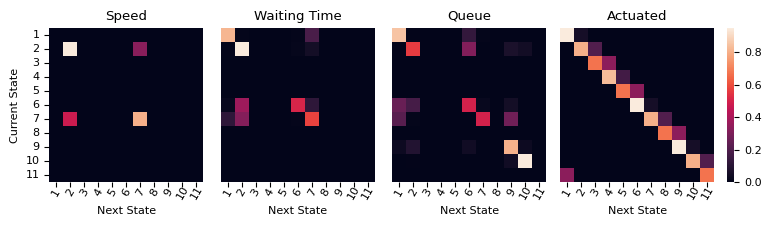

In [153]:
### ------ Phase Transition Matrix tls_159 ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(speed_eval, 'Speed'), (waitTime_200_eval, 'Waiting Time'), (queue_eval, 'Queue'), (df, 'Actuated')] # list of dataframes

num_dataframes = len(df_list)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 4, figsize=(9.8,2))

for i, (dataframe, name) in enumerate(df_list):
    
    # num_dataframes = len(tls_list)
    # fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))

    def transition_matrix(transitions, num_phases):
        phases = tls_159_states
        phase_to_index = {phase: index for index, phase in enumerate(phases)}
        matrix = [[0] * num_phases for _ in range(num_phases)]
        for (phase1, phase2) in transitions:
            i = phase_to_index[phase1]
            j = phase_to_index[phase2]
            matrix[i][j] += 1
        return matrix

    def normalize_matrix(matrix):
        normalized_matrix = []
        for row in matrix:
            row_sum = sum(row)
            if row_sum != 0:
                normalized_row = [value / row_sum for value in row]
            else:
                normalized_row = [0] * len(row)
            normalized_matrix.append(normalized_row)
        return normalized_matrix

    def create_heatmap(matrix, states, ax):
        sns.heatmap(matrix, square=True, xticklabels=["{0}".format(i+1) for i in range(num_phases)], yticklabels=["{0}".format(i+1) for i in range(num_phases)] if i == 0 else "", ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
        ax.set_xlabel("Next State")
        ax.set_ylabel("Current State" if i == 0 else "")
        ax.set_title(f"{name}")
        
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=60, verticalalignment="center")
        axs[i].set_yticklabels(axs[i].get_yticklabels(), rotation=0, verticalalignment="center")


    # append all states collected during training to list
    tls_allStates = dataframe['tls159_state'].tolist()
    #tls_allStates.append(x for x in tls_159_states if x not in tls_allStates)

    # get number of distinct phases
    num_phases = len(tls_159_states)

    # create list of tuples for state transitions
    transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)
    #print(matrix)

    # normalize matrix
    transition_matrix = normalize_matrix(matrix) 

    # plot heatmap in the corresponding subplot
    create_heatmap(transition_matrix, tls_159_states, axs[i])

# Adjust the spacing between subplots

#plt.tight_layout()
plt.subplots_adjust(wspace=-0.3, hspace=0)

# Show the figure
plt.show()


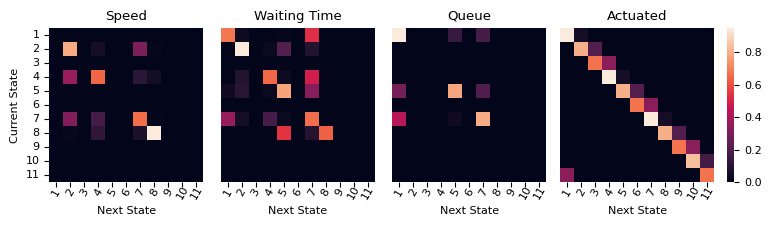

In [154]:
### ------ Phase Transition Matrix tls_160 ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(speed_eval, 'Speed'), (waitTime_200_eval, 'Waiting Time'), (queue_eval, 'Queue'), (df, 'Actuated')] # list of dataframes

num_dataframes = len(df_list)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 4, figsize=(9.8,2))

for i, (dataframe, name) in enumerate(df_list):
    
    # num_dataframes = len(tls_list)
    # fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))

    def transition_matrix(transitions, num_phases):
        phases = tls_160_states
        phase_to_index = {phase: index for index, phase in enumerate(phases)}
        matrix = [[0] * num_phases for _ in range(num_phases)]
        for (phase1, phase2) in transitions:
            i = phase_to_index[phase1]
            j = phase_to_index[phase2]
            matrix[i][j] += 1
        return matrix

    def normalize_matrix(matrix):
        normalized_matrix = []
        for row in matrix:
            row_sum = sum(row)
            if row_sum != 0:
                normalized_row = [value / row_sum for value in row]
            else:
                normalized_row = [0] * len(row)
            normalized_matrix.append(normalized_row)
        return normalized_matrix

    def create_heatmap(matrix, states, ax):
        sns.heatmap(matrix, square=True, xticklabels=["{0}".format(i+1) for i in range(num_phases)], yticklabels=["{0}".format(i+1) for i in range(num_phases)] if i == 0 else "", ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
        ax.set_xlabel("Next State")
        ax.set_ylabel("Current State" if i == 0 else "")
        ax.set_title(f"{name}")
        
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=60, verticalalignment="center")
        axs[i].set_yticklabels(axs[i].get_yticklabels(), rotation=0, verticalalignment="center")

    # append all states collected during training to list
    tls_allStates = dataframe['tls160_state'].tolist()
    #tls_allStates.append(x for x in tls_159_states if x not in tls_allStates)

    # get number of distinct phases
    num_phases = len(tls_160_states)

    # create list of tuples for state transitions
    transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)
    #print(matrix)

    # normalize matrix
    transition_matrix = normalize_matrix(matrix) 

    # plot heatmap in the corresponding subplot
    create_heatmap(transition_matrix, tls_160_states, axs[i])

# Adjust the spacing between subplots

#plt.tight_layout()
plt.subplots_adjust(wspace=-0.3, hspace=0)

# Show the figure
plt.show()


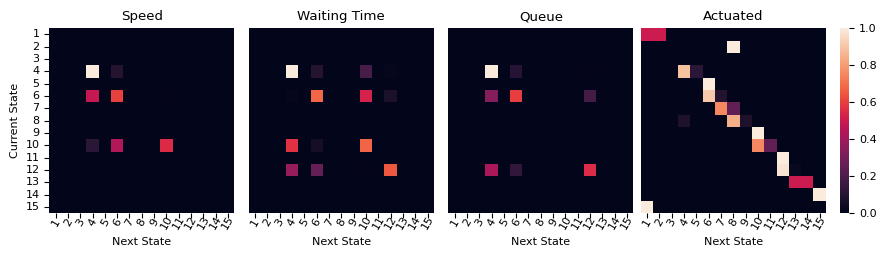

In [155]:
### ------ Phase Transition Matrix tls_161 ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls_159_state', 'tls_160_state', 'tls_161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(speed_eval, 'Speed'), (waitTime_200_eval, 'Waiting Time'), (queue_eval, 'Queue'), (df, 'Actuated')] # list of dataframes

num_dataframes = len(df_list)

# Create a figure with three subplots
fig, axs = plt.subplots(1, 4, figsize=(11.4, 2.4))

for i, (dataframe, name) in enumerate(df_list):
    
    # num_dataframes = len(tls_list)
    # fig, axs = plt.subplots(1, num_dataframes, figsize=(5*num_dataframes, 5))

    def transition_matrix(transitions, num_phases):
        phases = tls_161_states
        phase_to_index = {phase: index for index, phase in enumerate(phases)}
        matrix = [[0] * num_phases for _ in range(num_phases)]
        for (phase1, phase2) in transitions:
            i = phase_to_index[phase1]
            j = phase_to_index[phase2]
            matrix[i][j] += 1
        return matrix

    def normalize_matrix(matrix):
        normalized_matrix = []
        for row in matrix:
            row_sum = sum(row)
            if row_sum != 0:
                normalized_row = [value / row_sum for value in row]
            else:
                normalized_row = [0] * len(row)
            normalized_matrix.append(normalized_row)
        return normalized_matrix

    def create_heatmap(matrix, states, ax):
        sns.heatmap(matrix, square=True, xticklabels=["{0}".format(i+1) for i in range(num_phases)], yticklabels=["{0}".format(i+1) for i in range(num_phases)] if i == 0 else "", ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
        ax.set_xlabel("Next State")
        ax.set_ylabel("Current State" if i == 0 else "")
        ax.set_title(f"{name}")
        
        axs[i].set_xticklabels(axs[i].get_xticklabels(), rotation=60, verticalalignment="center")
        axs[i].set_yticklabels(axs[i].get_yticklabels(), rotation=0, verticalalignment="center")

    # append all states collected during training to list
    tls_allStates = dataframe['tls161_state'].tolist()
    #tls_allStates.append(x for x in tls_159_states if x not in tls_allStates)

    # get number of distinct phases
    num_phases = len(tls_161_states)

    # create list of tuples for state transitions
    transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

    # create transition matrix
    matrix = transition_matrix(transitions, num_phases)
    #print(matrix)

    # normalize matrix
    transition_matrix = normalize_matrix(matrix) 

    # plot heatmap in the corresponding subplot
    create_heatmap(transition_matrix, tls_161_states, axs[i])

# Adjust the spacing between subplots

#plt.tight_layout()
plt.subplots_adjust(wspace=-0.3, hspace=0)

# Show the figure
plt.show()


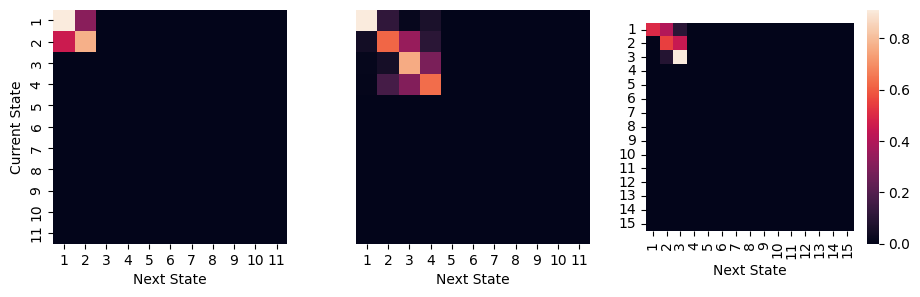

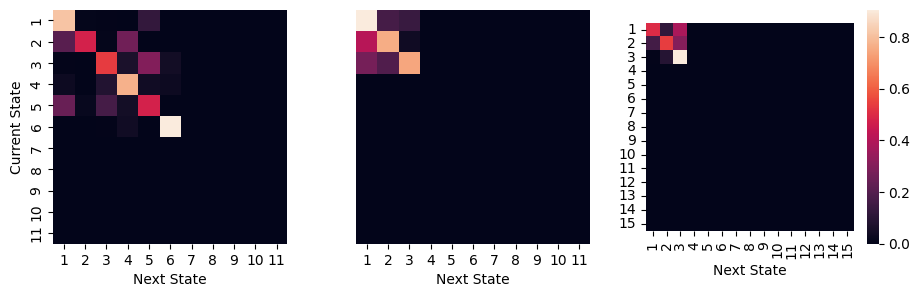

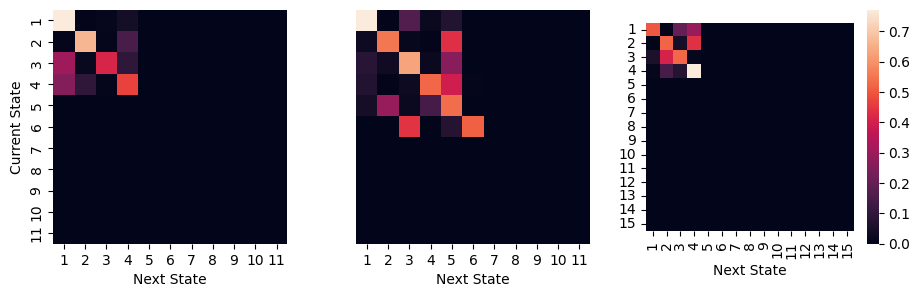

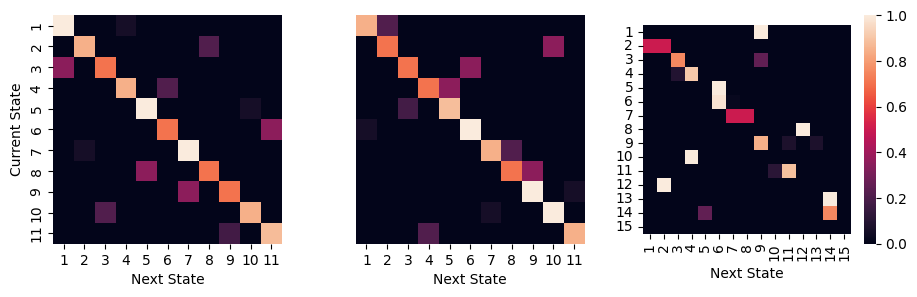

In [184]:
### ------ Phase Transition Matrix sorted by Reward Type ------ ###

# Create a figure with subplots based on the number of dataframes
tls_list = ['tls159_state', 'tls160_state', 'tls161_state'] # list of all possible states
unique_state_lists = [tls_159_states, tls_160_states, tls_161_states] # list of lists of unique states for each traffic light
df_list = [(speed_eval, 'Speed'), (queue_eval, 'Queue'), (waitTime_200_eval, 'WaitTime'), 
       (df, 'Actuated')]


for (df, name) in df_list:
    j = 0
    num_dataframes = len(tls_list)
    fig, axs = plt.subplots(1, num_dataframes, figsize=(9.5, 3))

    # Iterate over the dataframes and plot each one in a subplot
    for i, col in enumerate(tls_list):
        # create transition matrix and plot heatmap

        def transition_matrix(transitions, num_phases):
            phases = list(set(phase for transition in transitions for phase in transition))
            phase_to_index = {phase: index for index, phase in enumerate(phases)}
            matrix = [[0] * num_phases for _ in range(num_phases)]
            for (phase1, phase2) in transitions:
                i = phase_to_index[phase1]
                j = phase_to_index[phase2]
                matrix[i][j] += 1
            return matrix


        def normalize_matrix(matrix):
            normalized_matrix = []
            for row in matrix:
                row_sum = sum(row)
                if row_sum != 0:
                    normalized_row = [value / row_sum for value in row]
                else:
                    normalized_row = [0] * len(row)
                normalized_matrix.append(normalized_row)
            return normalized_matrix

        
        def create_heatmap(matrix, states, ax):
            sns.heatmap(matrix, square=True, xticklabels=["{0}".format(i+1) for i in range(num_phases)], yticklabels=["{0}".format(i+1) for i in range(num_phases)] if (i == 0 or i == 2) else "", ax=ax, cbar=i==num_dataframes-1, cbar_ax=None if i == num_dataframes-1 else False)
            ax.set_xlabel("Next State")
            ax.set_ylabel("Current State" if i == 0 else "")

            #ax.set_title(f"{name}" if i == 1 else "")
            ax.set_aspect("equal")

        # append all states collected during training to list
        tls_allStates = df[col].tolist()
        #tls_allStates.append(x for x in unique_state_lists[j] if x not in tls_allStates)

        # get number of distinct phases
        num_phases = len(unique_state_lists[j])

        # create list of tuples for state transitions
        transitions = [(tls_allStates[i], tls_allStates[i+1]) for i in range(len(tls_allStates)-1)]

        # create transition matrix
        matrix = transition_matrix(transitions, num_phases)
        #print(matrix)

        # normalize matrix
        transition_matrix = normalize_matrix(matrix)  # assuming you already have the transition matrix

        # plot heatmap in the corresponding subplot
        create_heatmap(transition_matrix, unique_state_lists[j], axs[i])
        
        j += 1

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Show the figure
    plt.show()


# plot heatmap
#create_heatmap(transition_matrix, set(tls_160_states))

### Polar Plots for Time Spent in State

In [63]:
# Retrieve all possible states for each traffic light
tls_159_states = ["GGGgrrrrrrgGgGGrrrGG",
        "GGGgrrrrrrgGgGGrrrrr",
        "yyygrrrrrryyyyyrrrrr",
        "GGGGrrrrrrrrrrrrrrrr",
        "yyyyrrrrrrrrrrrrrrrr",
        "rrrrgGGGrrrrrrrGGGrG",
        "rrrrgGGGrrrrrrrGrrrr",
        "rrrryyyyrrrrrrryrrrr",
        "rrrrrrrrggrrrrrrGGGr",
        "rrrrrrrrggrrrrrrrrrr",
        "rrrrrrrryyrrrrrrrrrr"]

tls_160_states = ["rgGgGrrrrrrrrrrrGGrGGrG",
        "rgGgGrrrrrrrrrrrrrrrrrr",
        "ryyyyrrrrrrrrrrrrrrrrrr",
        "rrrrrgrrrrrrggGGGGGrGGr",
        "rrrrrgrrrrrrggGGrrrrrrr",
        "rrrrryrrrrrryyyyrrrrrrr",
        "grrrrrGGgGGgrrrrrGGrrGG",
        "grrrrrGGgGGgrrrrrrrrrrr",
        "grrrrryyyyyyrrrrrrrrrrr",
        "Grrrrrrrrrrrrrrrrrrrrrr",
        "yrrrrrrrrrrrrrrrrrrrrrr"]

tls_161_states = ["yyyyyyryyyrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrry",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "ggggggggggrrggggggggggg",
        "rrrrrrryrryyrrrrrryyrrr",
        "rrrrrrrgrrggrrrrrrggrrr",
        "rrrrrrrrrrrrrrrrrryyrrr",
        "rrrrrrrrrrrrrrrrrrrrrrr",
        "yyyyyyyryyrrrrrrrrrrgrr",
        "gggggggrggrrrrrrrrrrgrr",
        "ggggggggggrrrrrrrrrrgry",
        "ggggggggggrrrrrrrrrrgrg",
        "ggggggyryyrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrrg",
        "yyyyyyrrrrrrrrrrrrrrrry"]

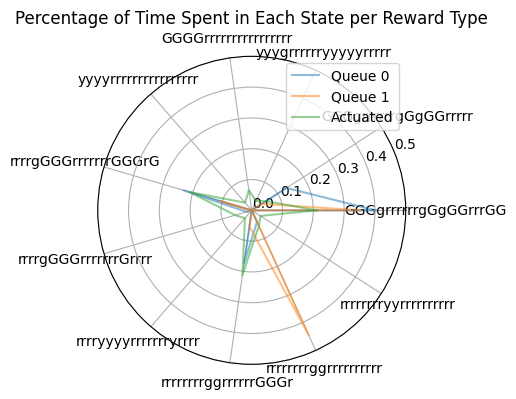

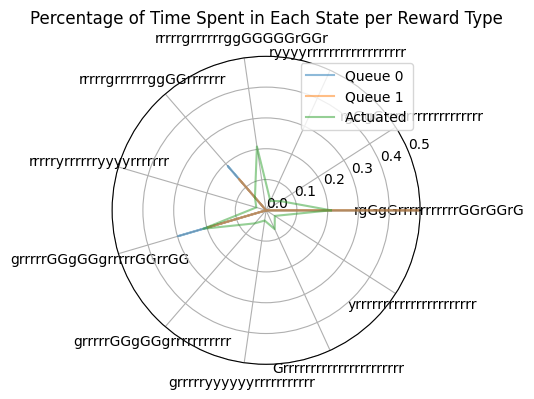

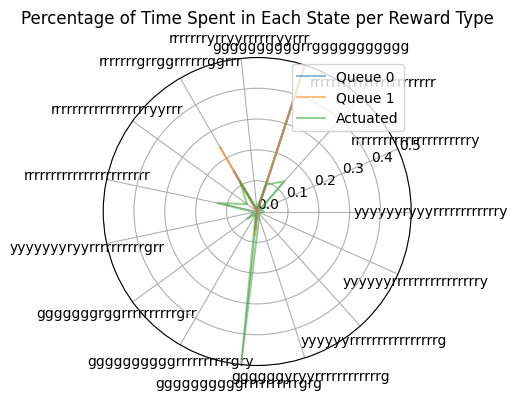

In [126]:
import matplotlib.pyplot as plt
import numpy as np

# List of dataframes and corresponding policies
configs = [(queue_0, 'Queue 0'), (queue_1, 'Queue 1'), (df, 'Actuated')]
traffic_lights = ['tls159_state', 'tls160_state', 'tls161_state']
lists = [tls_159_states, tls_160_states, tls_161_states]

for i, tls in enumerate(traffic_lights):
    
    states = lists[i]

    # Create a figure
    fig, ax = plt.subplots(figsize=(4, 4), subplot_kw=dict(polar=True))

    # Create the angles for the polar plot
    angles = np.linspace(0, 2 * np.pi, len(states), endpoint=False).tolist()

    # Make the plot circular
    angles += angles[:1]

    # Iterate over the configurations
    for df, policy in configs:
        # Calculate the time spent in each state
        time_in_state = df[tls].value_counts()

        # Normalize the values to range from 0 to 1
        values = [time_in_state.get(state, 0) / time_in_state.values.sum() for state in states]

        # Repeat the first value to close the circular plot
        values += values[:1]

        # Plot the data for the current configuration
        ax.plot(angles, values, label=policy, alpha=0.5)

    # Add a legend
    ax.legend(loc='upper right')

    # Set ytick labels as decimals and limit the scale to 0.5
    yticks = np.linspace(0, 0.5, num=6)
    ax.set_yticks(yticks)
    ax.set_yticklabels(['{:.1f}'.format(y) for y in yticks])

    # Set xtick labels
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(states)

    # Limit the radial axis to 0.5
    ax.set_ylim(0, 0.5)

    # Add a title
    ax.set_title('Percentage of Time Spent in Each State per Reward Type')

    plt.show()
